In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Datsets/energy.csv')
data

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [7]:
# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   Unnamed: 0 Country                Energy_type  Year  Energy_consumption  \
0           0   World           all_energy_types  1980          292.899790   
1           1   World                       coal  1980           78.656134   
2           2   World                natural_gas  1980           53.865223   
3           3   World  petroleum_n_other_liquids  1980          132.064019   
4           4   World                    nuclear  1980            7.575700   

   Energy_production           GDP    Population  Energy_intensity_per_capita  \
0         296.337228  27770.910281  4.298127e+06                    68.145921   
1          80.114194  27770.910281  4.298127e+06                    68.145921   
2          54.761046  27770.910281  4.298127e+06                    68.145921   
3         133.111109  27770.910281  4.298127e+06                    68.145921   
4           7.575700  27770.910281  4.298127e+06                    68.145921   

   Energy_intensity_by_GDP 

In [8]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill or drop missing values (example: using mean for numerical columns)
for column in data.select_dtypes(include=np.number).columns:
    if data[column].isnull().sum() > 0:
        data.loc[:, column] = data[column].fillna(data[column].mean())

# Fill or drop missing categorical values (example: using mode)
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data.loc[:, column] = data[column].fillna(data[column].mode()[0])

print("\nMissing Values After Handling:")
print(data.isnull().sum())
print(data.shape)



Missing Values:
Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

Missing Values After Handling:
Unnamed: 0                     0
Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64
(55440, 11)


In [9]:

# Remove duplicates if any
data = data.drop_duplicates().copy()  # Use .copy() to avoid warning

# Drop rows with NaN values
data = data.dropna().copy()  # Again, ensure a copy is made

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Filter dataset to keep only rows where energy_type is 'all_energy_types'
if "energy_type" in data.columns:
    data = data[data["energy_type"] == "all_energy_types"].copy()  # Use .copy() here too
else:
    print("Warning: 'energy_type' column not found!")

# Display the first few rows to confirm the filtering
print("\nData after filtering:")
print(data.head())
print("Dataset shape:", data.shape)



Data after filtering:
    unnamed:_0         country       energy_type  year  energy_consumption  \
0            0           World  all_energy_types  1980          292.899790   
6            6     Afghanistan  all_energy_types  1980            0.026583   
12          12         Albania  all_energy_types  1980            0.162982   
18          18         Algeria  all_energy_types  1980            0.780695   
24          24  American Samoa  all_energy_types  1980            0.005893   

    energy_production           gdp    population  \
0          296.337228  27770.910281  4.298127e+06   
6            0.072561    827.144126  1.335650e+04   
12           0.155562    827.144126  2.682700e+03   
18           2.803017    827.144126  1.922170e+04   
24           0.000000    827.144126  3.264600e+01   

    energy_intensity_per_capita  energy_intensity_by_gdp  co2_emission  
0                     68.145921                   10.547   4946.627130  
6                      1.990283            

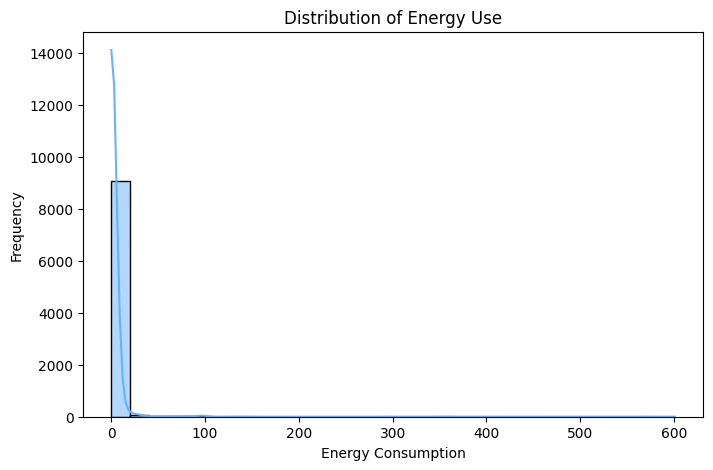

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data["energy_consumption"], bins=30, kde=True, color="#66B2FF")
plt.title("Distribution of Energy Use")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


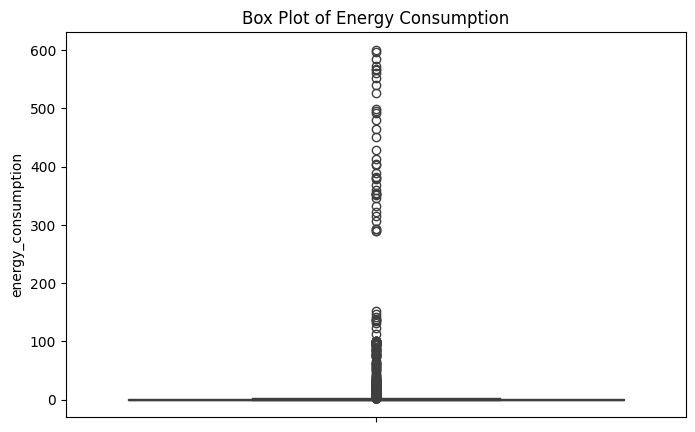

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create the box plot
sns.boxplot(y=data['energy_consumption'])

# Add title
plt.title('Box Plot of Energy Consumption')

# Show the plot
plt.show()


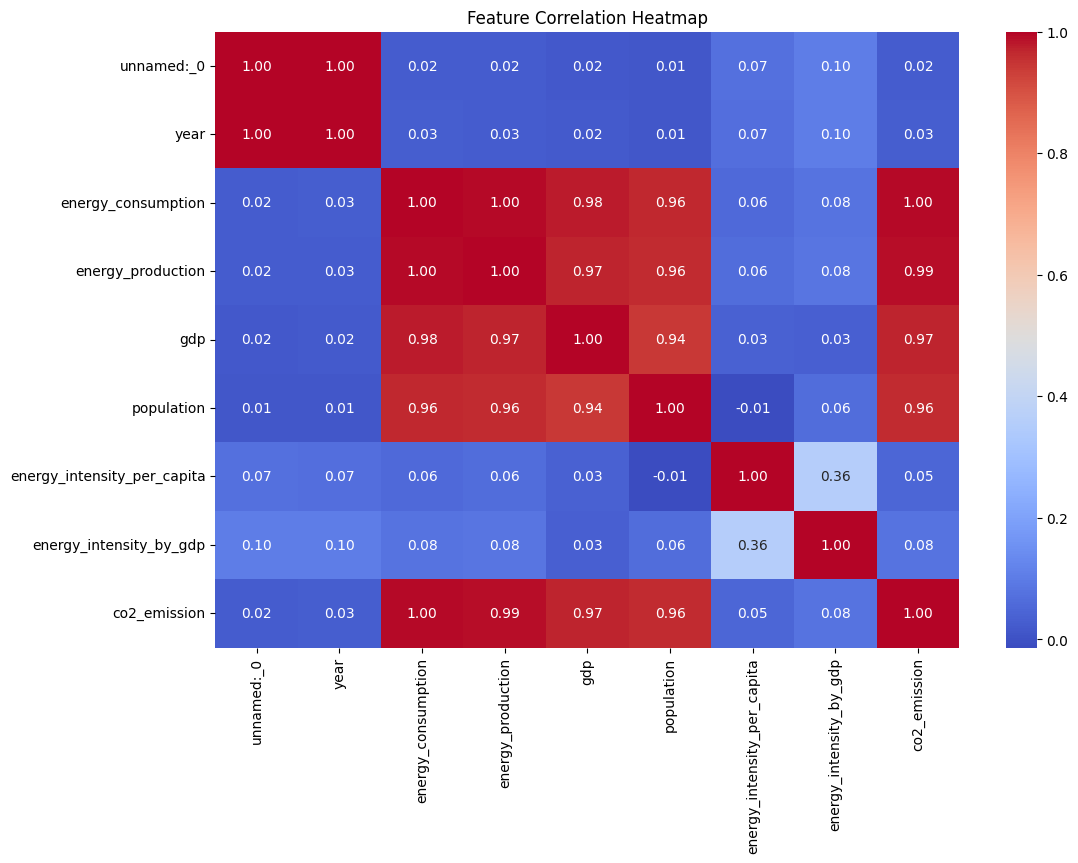

In [12]:

# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


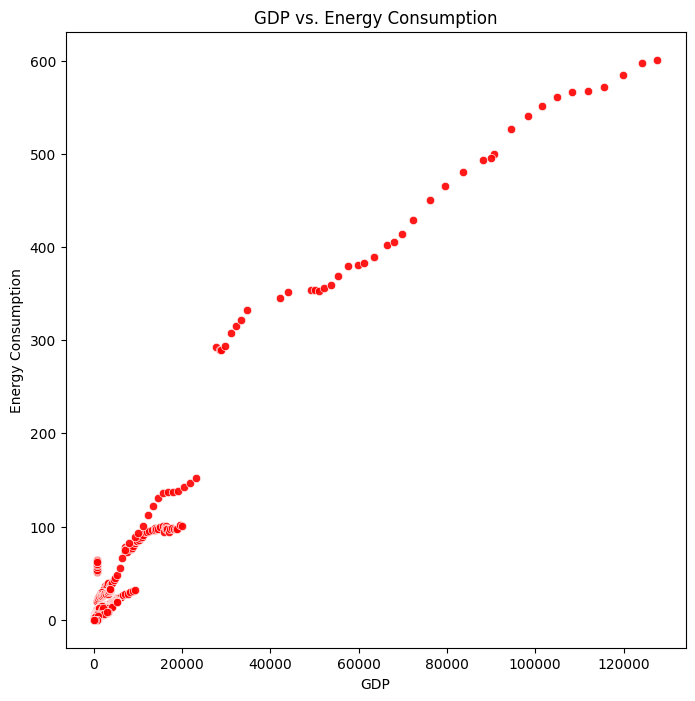

In [13]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data["gdp"], y=data["energy_consumption"],alpha=0.9, color='red')
plt.title("GDP vs. Energy Consumption")
plt.xlabel("GDP")
plt.ylabel("Energy Consumption")
plt.show()



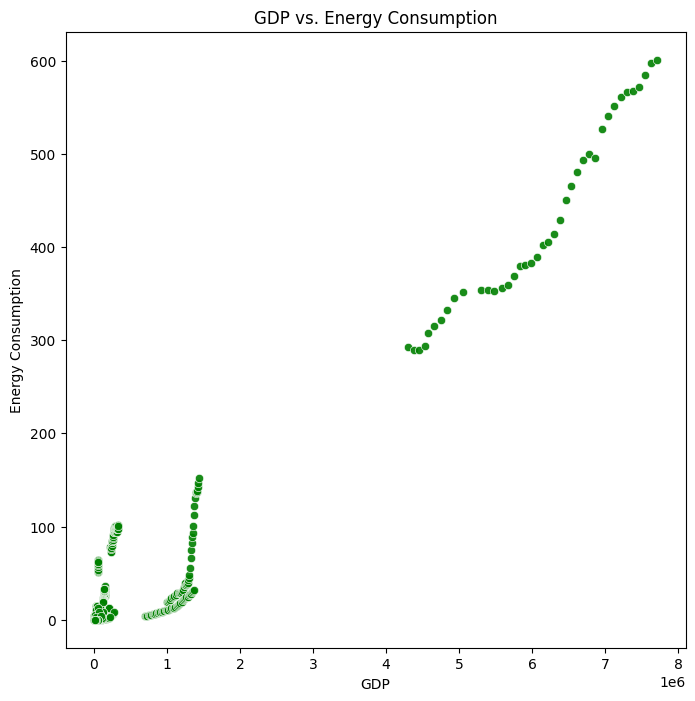

In [14]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data["population"], y=data["energy_consumption"],alpha=0.9, color='green')
plt.title("GDP vs. Energy Consumption")
plt.xlabel("GDP")
plt.ylabel("Energy Consumption")
plt.show()



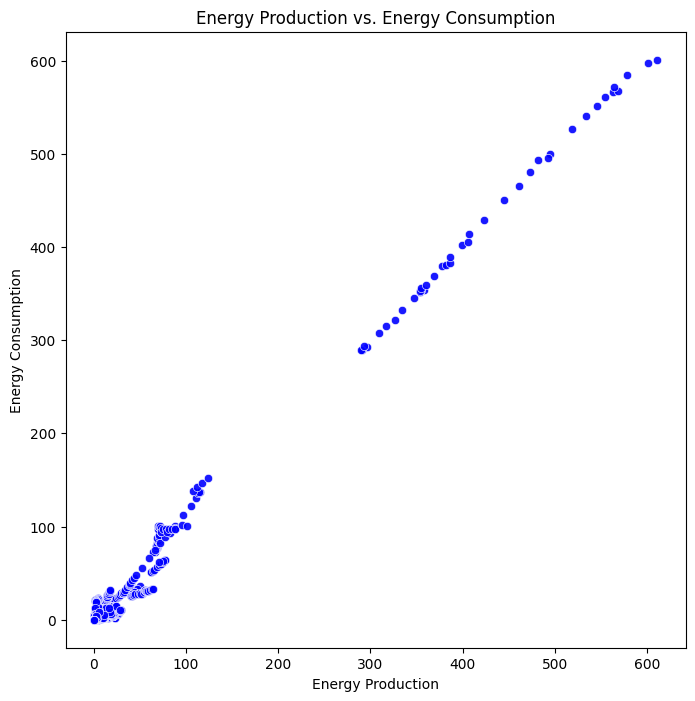

In [15]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data["energy_production"], y=data["energy_consumption"],alpha=0.9,color="blue")
plt.title("Energy Production vs. Energy Consumption")
plt.xlabel("Energy Production")
plt.ylabel("Energy Consumption")
plt.show()


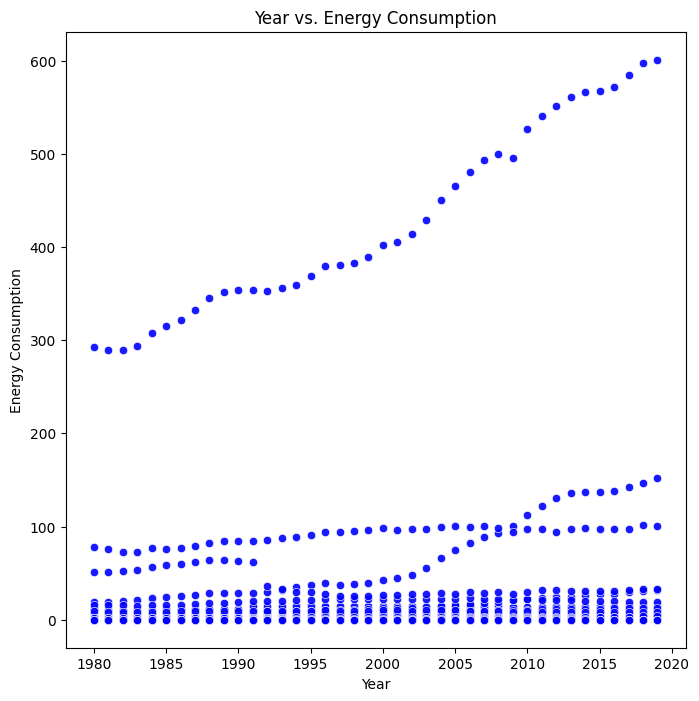

In [16]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data["year"], y=data["energy_consumption"],alpha=0.9,color="blue")
plt.title("Year vs. Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.show()


In [17]:
print(data.columns)

Index(['unnamed:_0', 'country', 'energy_type', 'year', 'energy_consumption',
       'energy_production', 'gdp', 'population', 'energy_intensity_per_capita',
       'energy_intensity_by_gdp', 'co2_emission'],
      dtype='object')


In [18]:
# Extract relevant data
X = data[['year',
       'energy_production', 'gdp', 'population', 'energy_intensity_per_capita',
       'energy_intensity_by_gdp']].values
y = data['energy_consumption'].values

# Handle missing values (drop rows with NaN for simplicity)
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Normalize features for better optimization performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add a bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into train and test sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    predictions = X_train.dot(weights)
    errors = predictions - y_train
    gradient = (1 / len(y_train)) * X_train.T.dot(errors)
    weights -= learning_rate * gradient

# Prediction function
def predict(X, weights):
    return X.dot(weights)

# Evaluate on the train and test sets
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

# Print results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MSE: 9.705790748116776
Test MSE: 14.005816015504067
Train R-squared: 0.9866097579971507
Test R-squared: 0.9909718051328595


In [19]:
from sklearn.linear_model import LinearRegression

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)

print("Linear Regression model trained.")

Linear Regression model trained.


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Model 2: Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Regressor model trained.")

Random Forest Regressor model trained.


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Model 1: Linear Regression
mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_test_pred_linear)

# Evaluate Model 2: Random Forest Regressor
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_test_pred_rf)

# Print Results
print("Model 1: Linear Regression")
print(f"MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}, R-squared: {r2_linear:.4f}")

print("\nModel 2: Random Forest Regressor")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")

# Compare and Identify the Better Model
if r2_rf > r2_linear:
    print("\nConclusion: Random Forest Regressor performed better based on R-squared value.")
else:
    print("\nConclusion: Linear Regression performed better based on R-squared value.")

Model 1: Linear Regression
MAE: 1.2506, RMSE: 3.8876, R-squared: 0.9903

Model 2: Random Forest Regressor
MAE: 0.6231, RMSE: 4.0898, R-squared: 0.9892

Conclusion: Linear Regression performed better based on R-squared value.


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 0.01}


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters for Random Forest
param_dist_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV for Random Forest
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=50, cv=5, random_state=42, scoring='r2')
random_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters for Random Forest: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [24]:
# Summarize the best hyperparameters for both models
print("Hyperparameter Optimization Results:")
print(f"Model 1 (Ridge Regression): Best Parameters: {best_params_linear}")
print(f"Model 2 (Random Forest Regressor): Best Parameters: {best_params_rf}")

Hyperparameter Optimization Results:
Model 1 (Ridge Regression): Best Parameters: {'alpha': 0.01}
Model 2 (Random Forest Regressor): Best Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Model: Ridge Regression with optimal hyperparameters from previous step
ridge_model = Ridge(alpha=best_params_linear['alpha'])

# Perform Recursive Feature Elimination (RFE)
rfe_linear = RFE(estimator=ridge_model, n_features_to_select=4)  # Select top 3 features for demonstration
rfe_linear.fit(X_train, y_train)

# Identify selected features
selected_features_linear = rfe_linear.support_  # Boolean mask of selected features
feature_names = ['gdp', 'population',  'year' , 'energy_production', 'energy_intensity_per_capita',
                 'energy_intensity_by_gdp'
                 ]
selected_feature_names_linear = [feature for feature, selected in zip(feature_names, selected_features_linear) if selected]

print("Best features for Linear Regression (Ridge):", selected_feature_names_linear)

Best features for Linear Regression (Ridge): ['year', 'energy_production', 'energy_intensity_per_capita']


In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Model: Random Forest Regressor with optimal hyperparameters from previous step
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Perform feature selection based on importance scores
sfm_rf = SelectFromModel(rf_model, threshold="median")  # Select features with importance above the median
sfm_rf.fit(X_train, y_train)

# Identify selected features
selected_features_rf = sfm_rf.get_support()  # Boolean mask of selected features
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, selected_features_rf) if selected]

print("Best features for Random Forest Regressor:", selected_feature_names_rf)

Best features for Random Forest Regressor: ['year', 'energy_production', 'energy_intensity_per_capita']


In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert the selected feature names to indices
selected_feature_indices_ridge = [feature_names.index(feature) for feature in selected_feature_names_linear]

# Use the indices to select features from X_train and X_test
X_train_best_features_ridge = X_train[:, selected_feature_indices_ridge]
X_test_best_features_ridge = X_test[:, selected_feature_indices_ridge]

# Rebuild the Ridge Regression model with the best hyperparameter
final_ridge_model = Ridge(alpha=best_params_linear['alpha'])

# Train the final Ridge Regression model
final_ridge_model.fit(X_train_best_features_ridge, y_train)

# Predict on the test set
y_test_pred_final_ridge = final_ridge_model.predict(X_test_best_features_ridge)

# Evaluate the final model's performance
mae_final_ridge = mean_absolute_error(y_test, y_test_pred_final_ridge)
rmse_final_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_final_ridge))
r2_final_ridge = r2_score(y_test, y_test_pred_final_ridge)

# Print the results
print("Final Ridge Regression Model Performance with Selected Features:")
print(f"MAE: {mae_final_ridge:.4f}, RMSE: {rmse_final_ridge:.4f}, R-squared: {r2_final_ridge:.4f}")

# Compare with the original Ridge Regression model
print("\nComparison with Original Ridge Regression Model:")
print(f"MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}, R-squared: {r2_linear:.4f}")
print(f"Final MAE: {mae_final_ridge:.4f}, RMSE: {rmse_final_ridge:.4f}, R-squared: {r2_final_ridge:.4f}")

# Conclusion
if r2_final_ridge > r2_linear:
    print("\n Conclusion: The final Ridge Regression model with selected features and optimized hyperparameters performed better.")
else:
    print("\n Conclusion: The final Ridge Regression model did not perform better than the original.")


Final Ridge Regression Model Performance with Selected Features:
MAE: 1.3153, RMSE: 3.8420, R-squared: 0.9905

Comparison with Original Ridge Regression Model:
MAE: 1.2506, RMSE: 3.8876, R-squared: 0.9903
Final MAE: 1.3153, RMSE: 3.8420, R-squared: 0.9905

 Conclusion: The final Ridge Regression model with selected features and optimized hyperparameters performed better.
